# Ионов Степан Александрович, ИУ5-62Б <br />Вариант №10: номер задачи - 2; номер набора данных - 2.

In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams # для того, чтобы задавать размер диаграмм
%matplotlib inline

In [2]:
data = pd.read_csv('data/dc-wikia-data.csv', sep=',')

In [3]:
data.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
0,1422,Batman (Bruce Wayne),\/wiki\/Batman_(Bruce_Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3093.0,"1939, May",1939.0
1,23387,Superman (Clark Kent),\/wiki\/Superman_(Clark_Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2496.0,"1986, October",1986.0
2,1458,Green Lantern (Hal Jordan),\/wiki\/Green_Lantern_(Hal_Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,1565.0,"1959, October",1959.0
3,1659,James Gordon (New Earth),\/wiki\/James_Gordon_(New_Earth),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,NaN,Living Characters,1316.0,"1987, February",1987.0
4,1576,Richard Grayson (New Earth),\/wiki\/Richard_Grayson_(New_Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,1237.0,"1940, April",1940.0


In [4]:
data.isnull().sum()

page_id                0
name                   0
urlslug                0
ID                  2013
ALIGN                601
EYE                 3628
HAIR                2274
SEX                  125
GSM                 6832
ALIVE                  3
APPEARANCES          355
FIRST APPEARANCE      69
YEAR                  69
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6896 entries, 0 to 6895
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   page_id           6896 non-null   int64  
 1   name              6896 non-null   object 
 2   urlslug           6896 non-null   object 
 3   ID                4883 non-null   object 
 4   ALIGN             6295 non-null   object 
 5   EYE               3268 non-null   object 
 6   HAIR              4622 non-null   object 
 7   SEX               6771 non-null   object 
 8   GSM               64 non-null     object 
 9   ALIVE             6893 non-null   object 
 10  APPEARANCES       6541 non-null   float64
 11  FIRST APPEARANCE  6827 non-null   object 
 12  YEAR              6827 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 700.5+ KB


In [6]:
mising_count = data.isnull().sum()
all_count = data.isnull().count()
pd.concat([mising_count.sort_values(), (mising_count/all_count*100).sort_values()], 
          axis=1, keys=['Количество пропусков', 'Процент пропусков']).tail(11)

,Количество пропусков,Процент пропусков
urlslug,0,0.000000
ALIVE,3,0.043503
FIRST APPEARANCE,69,1.000580
YEAR,69,1.000580
SEX,125,1.812645
APPEARANCES,355,5.147912
ALIGN,601,8.715197
ID,2013,29.190835
HAIR,2274,32.975638
EYE,3628,52.610209


## Обработка пропусков для категориального признака "GSM"

Так как процент пропусков слишком высокий (99 %), выполним удаление данного признака

In [7]:
data.drop(['GSM'], axis=1, inplace=True)

## Обработка пропусков для численного признака "APPEARANCES"

Так как процент пропусков невысокий (5 %), выполним заполнение этого признака

Text(0.5, 1.0, 'Distribution of APPEARANCES')

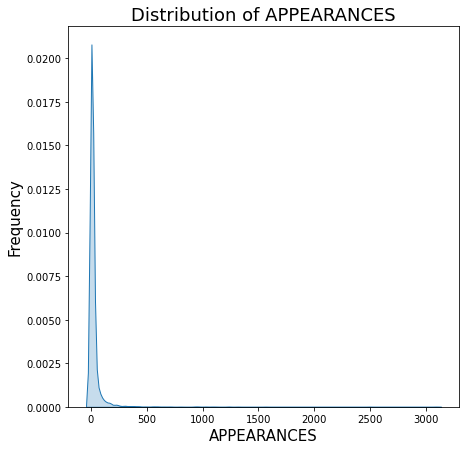

In [8]:
rcParams['figure.figsize'] = 7,7
g = sns.kdeplot(data=data, x="APPEARANCES", shade=True)
g.set_xlabel("APPEARANCES", size = 15)
g.set_ylabel("Frequency", size = 15)
plt.title('Distribution of APPEARANCES', size = 18)

Мы имеем одномодальное распределение, поэтому чтобы как можно меньше изменить гистограмму распределения для этого признака, будем использовать для заполнения пустых значений моду

In [9]:
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data[['APPEARANCES']])
imp_num = SimpleImputer(strategy='most_frequent')
data_num_imp = imp_num.fit_transform(data[['APPEARANCES']])
data['APPEARANCES'] = data_num_imp
filled_data = data_num_imp[mask_missing_values_only]
print('APPEARANCES', 'most_frequent', filled_data.size, filled_data[0], filled_data[filled_data.size-1], sep='; ')

APPEARANCES; most_frequent; 355; 1.0; 1.0


## Итоговый вид датасета после обработки пропусков в двух признаках

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6896 entries, 0 to 6895
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   page_id           6896 non-null   int64  
 1   name              6896 non-null   object 
 2   urlslug           6896 non-null   object 
 3   ID                4883 non-null   object 
 4   ALIGN             6295 non-null   object 
 5   EYE               3268 non-null   object 
 6   HAIR              4622 non-null   object 
 7   SEX               6771 non-null   object 
 8   ALIVE             6893 non-null   object 
 9   APPEARANCES       6896 non-null   float64
 10  FIRST APPEARANCE  6827 non-null   object 
 11  YEAR              6827 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 646.6+ KB


## Выводы

В данной работе для обработки пропусков данных мы воспользовались двумя стратегиями: 1) удаление признака, содержащего большое количество пропусков (99%); 2) импутация данных в признаке, в котором количество пропусков не превышает порогового (5%), путем заполнения наиболее часто встречаемым значением (вывод о применимости моды был сделан исходя из гистограммы распределения).

Из представленных выше признаков также стоит отбросить признак "EYE" с высоким процентом пропусков (52%): удаление строк привело бы к серьезной потере размера датасета, а заполнение пропусков привело бы к возможному нарушению набора данных (неправильные данные). Также из описания датасета можно понять, что столбцы "FIRST APPEARANCE" и "YEAR" означают одно и то же. Кроме того, исследование количества пропусков дают одинаковые показатели, а значит, скорее всего, эти признаки содержат одинаковые данные. В дальнейшем можно оставить один из них. В остальных признаках можно либо выбросить строки с пустыми значениями, либо заполнить их. <br/>Окончательное решение по выбору признаков, поступающих на вход модели, может приниматься после проведения корреляционного анализа. Также после после проведения кросс-валидации и подбора оптимальных параметров модели возможен пересмотр набора признаков: либо их удаление, либо их добавление в зависимости от результатов работы алгоритма  машинного обучения